<a href="https://colab.research.google.com/github/Meitarani-Rezki-Handayani/Belajar-Deep-Learning/blob/main/klasifikasi3JenisSayur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download meitaranirezkih/brokoli-kol-kembangkol
!mkdir train
!unzip /content/brokoli-kol-kembangkol.zip -d /content/train
!rm /content/brokoli-kol-kembangkol.zip
!rm /content/kaggle.json

In [4]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [5]:
dataset_path = Path(r'/content/train')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [6]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/train/kol/kol (16).jpg,kol
1,/content/train/kol/kol (22).jpg,kol
2,/content/train/kol/kol (32).jpg,kol
3,/content/train/kol/kol (83).jpg,kol
4,/content/train/kol/kol (37).jpg,kol


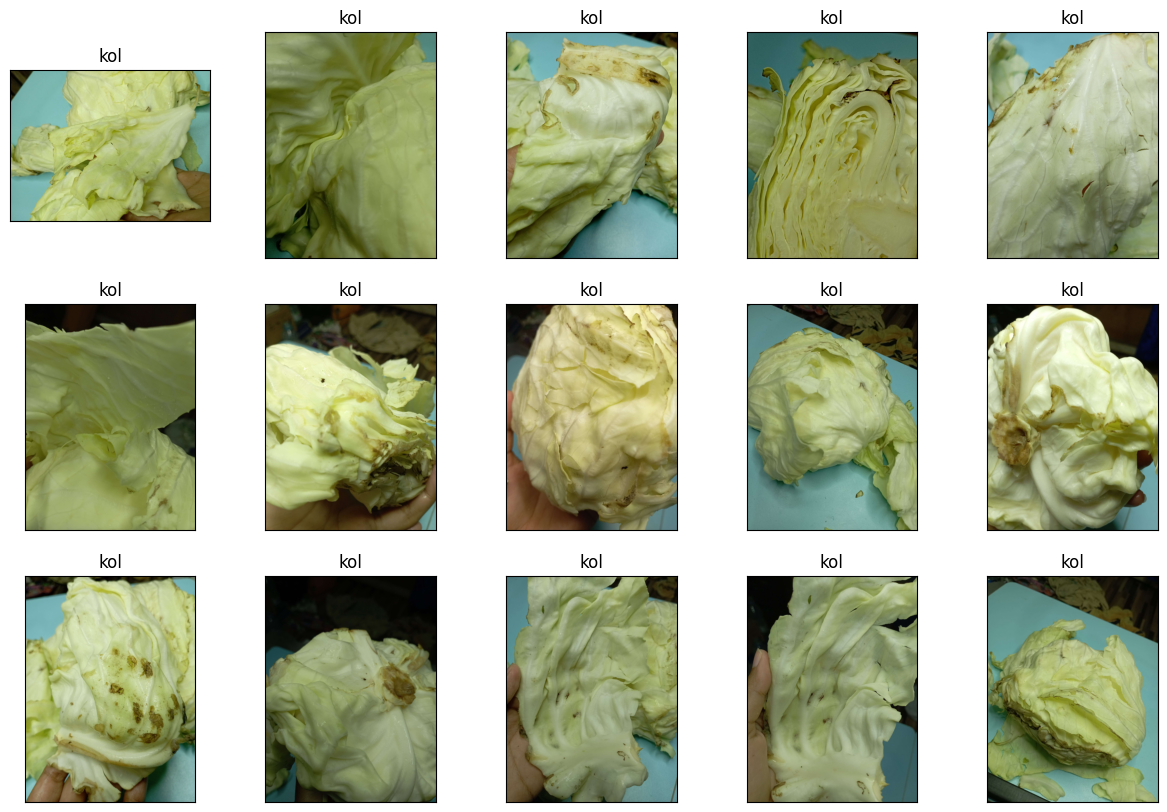

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [8]:
df.label.value_counts()

kol            100
kembang-kol    100
brokoli        100
Name: label, dtype: int64

In [9]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

kol            100
kembang-kol    100
brokoli        100
Name: label, dtype: int64

In [10]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [11]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (168, 2)
Shape of test data (90, 2)
Shape of validation data (42, 2)


In [12]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 168 validated image filenames belonging to 3 classes.
Found 90 validated image filenames belonging to 3 classes.
Found 42 validated image filenames belonging to 3 classes.


In [13]:
input_shape = (200, 200, 3)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [39]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
history = model.fit(train, batch_size= 32, validation_data=val, epochs=30)

Epoch 1/30
6/6 [==============================] - 29s 2s/step - loss: 1.0599 - accuracy: 0.7857 - val_loss: 0.4925 - val_accuracy: 0.8810
Epoch 2/30
6/6 [==============================] - 9s 2s/step - loss: 0.3046 - accuracy: 0.9048 - val_loss: 0.1537 - val_accuracy: 0.9286
Epoch 3/30
6/6 [==============================] - 10s 2s/step - loss: 0.2393 - accuracy: 0.8988 - val_loss: 0.3245 - val_accuracy: 0.8810
Epoch 4/30
6/6 [==============================] - 10s 2s/step - loss: 0.2379 - accuracy: 0.9226 - val_loss: 0.2138 - val_accuracy: 0.9048
Epoch 5/30
6/6 [==============================] - 10s 2s/step - loss: 0.1418 - accuracy: 0.9643 - val_loss: 0.0689 - val_accuracy: 1.0000
Epoch 6/30
6/6 [==============================] - 10s 2s/step - loss: 0.1126 - accuracy: 0.9643 - val_loss: 0.1329 - val_accuracy: 0.9524
Epoch 7/30
6/6 [==============================] - 10s 2s/step - loss: 0.1168 - accuracy: 0.9643 - val_loss: 0.0680 - val_accuracy: 0.9762
Epoch 8/30
6/6 [===================

In [43]:
model.save('model-1.h5')

In [44]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

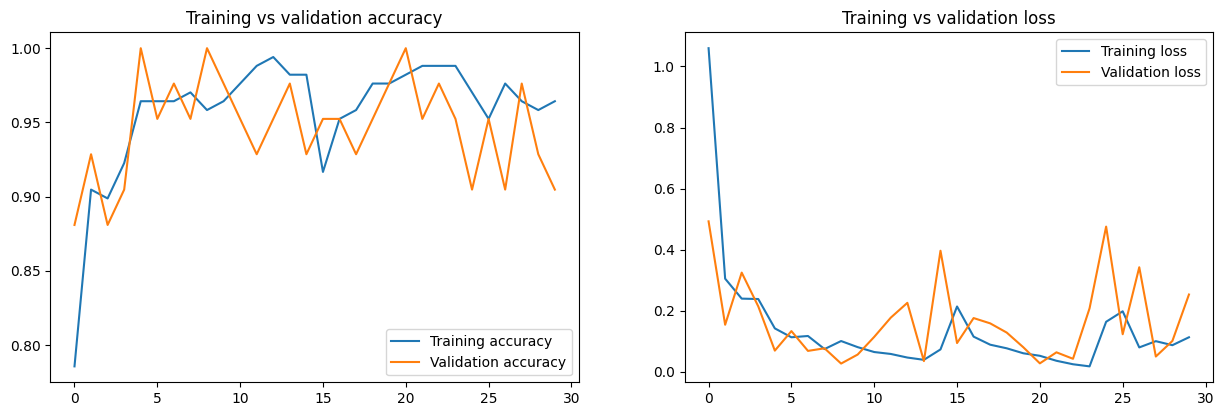

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [46]:
pred = model.predict(test)

3/3 [==============================] - 4s 1s/step


In [47]:
pred = np.argmax(pred, axis=1)

In [48]:
labels = train.class_indices

In [49]:
labels

{'brokoli': 0, 'kembang-kol': 1, 'kol': 2}

In [50]:
labels = dict((v,k) for k, v in labels.items())

In [51]:
labels

{0: 'brokoli', 1: 'kembang-kol', 2: 'kol'}

In [52]:
y_pred = [labels[k] for k in pred]

In [53]:
print(classification_report(x_test.label, y_pred))

              precision    recall  f1-score   support

     brokoli       0.92      0.96      0.94        24
 kembang-kol       0.96      0.79      0.87        33
         kol       0.87      1.00      0.93        33

    accuracy                           0.91        90
   macro avg       0.92      0.92      0.91        90
weighted avg       0.92      0.91      0.91        90



In [54]:
print(confusion_matrix(x_test.label, y_pred))

[[23  1  0]
 [ 2 26  5]
 [ 0  0 33]]


In [55]:
test_accuracy = model.evaluate(test)[1]

3/3 [==============================] - 4s 1s/step - loss: 0.4569 - accuracy: 0.8556
